# DataGenerator

In [13]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:/Users/CWIN/Desktop/Dataset/Dataset/test_set',target_size=(150, 150),batch_size=batch_size,class_mode='binary')

val_generator = val_datagen.flow_from_directory('C:/Users/CWIN/Desktop/Dataset/Dataset/test_set',target_size=(150, 150),batch_size=batch_size,class_mode='binary')

Found 121 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


# Build Model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

# Train

In [15]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
8/8 [==============================] - 22s 3s/step - loss: 0.8182 - acc: 0.6694 - val_loss: 0.3833 - val_acc: 0.8430
Epoch 2/10
8/8 [==============================] - 19s 3s/step - loss: 0.3113 - acc: 0.9091 - val_loss: 0.2203 - val_acc: 0.9256
Epoch 3/10
8/8 [==============================] - 19s 3s/step - loss: 0.2892 - acc: 0.9091 - val_loss: 0.1257 - val_acc: 0.9669
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 0.1327 - acc: 0.9587 - val_loss: 0.1151 - val_acc: 0.9504
Epoch 5/10
8/8 [==============================] - 19s 3s/step - loss: 0.1893 - acc: 0.9256 - val_loss: 0.0726 - val_acc: 0.9587
Epoch 6/10
8/8 [==============================] - 19s 3s/step - loss: 0.1331 - acc: 0.9587 - val_loss: 0.1542 - val_acc: 0.9669
Epoch 7/10
8/8 [==============================] - 19s 3s/step - loss: 0.1832 - acc: 0.9256 - val_loss: 0.0533 - val_acc: 0.9752
Epoch 8/10
8/8 [==============================] - 19s 3s/step - loss: 0.1080 - acc: 0.9752 - val_loss: 0

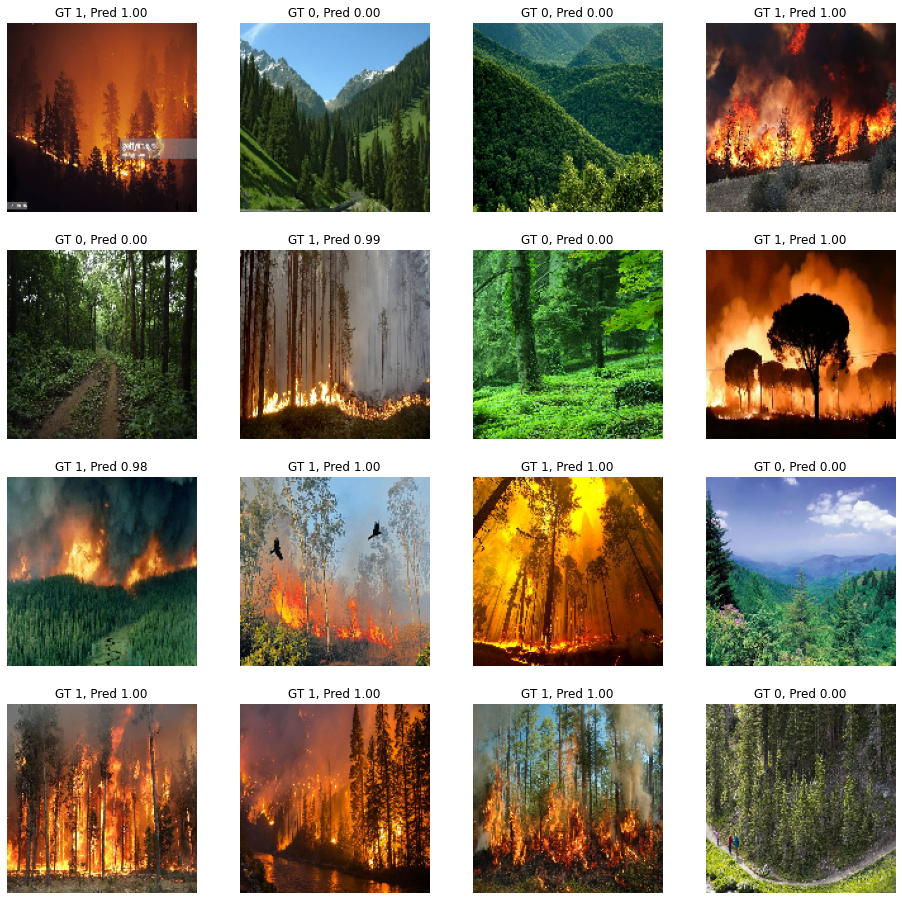

In [16]:
import matplotlib.pyplot as plt

val_imgs, val_labels = val_generator.__getitem__(0)

preds = model.predict(val_imgs)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred))
    ax.set_axis_off()